<a href="https://colab.research.google.com/github/brenodocarmo/Api-TCC/blob/main/cpu_percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [107]:
# Caminho do arquivo

# arquivo = ("/content/drive/MyDrive/TCC/Dados Coletados/cpu_info_round_robin.csv")
# arquivo = ("/content/drive/MyDrive/TCC/Dados Coletados/cpu_info_up_hash.csv")
arquivo = ("/content/drive/MyDrive/TCC/Dados Coletados/cpu_info_weight.csv")
# arquivo = ("/content/drive/MyDrive/TCC/Dados Coletados/cpu_info_least_conn.csv")




# Carrega o arquivo .csv em um DataFrame
df = pd.read_csv(arquivo)

# Seleciona apenas as linhas que correspondem à sua condição
docker_select_cpu_one = df.loc[df['Container Name'] == "27b74737b1e4"]
docker_select_cpu_two = df.loc[df['Container Name'] == "855b6efd826a"]
docker_select_cpu_three = df.loc[df['Container Name'] == "78f9256f4199"]

docker_one = docker_select_cpu_one["CPU Percent"].tolist()
docker_two = docker_select_cpu_two["CPU Percent"].tolist()
docker_three = docker_select_cpu_three["CPU Percent"].tolist()

# Exibe as linhas selecionadas
print(docker_one)
print(docker_two)
print(docker_three)
print(df)

None
None
None
    Container Name  CPU Percent  System CPU Percent  Memory Percent
0     27b74737b1e4         20.8      30376350000000            25.8
1     855b6efd826a         25.7      30384370000000            25.8
2     78f9256f4199         37.4      30392290000000            25.8
3     27b74737b1e4         40.3      30404210000000            25.8
4     855b6efd826a         37.1      30412220000000            25.8
..             ...          ...                 ...             ...
176   78f9256f4199          3.1      31910090000000            25.8
177   27b74737b1e4          3.3      31922190000000            25.8
178   855b6efd826a          2.6      31930230000000            25.8
179   78f9256f4199          5.6      31938330000000            25.8
180   27b74737b1e4         13.8      31950270000000            25.8

[181 rows x 4 columns]


In [120]:
docker_mediana_one = np.median(sorted(docker_one))
docker_mediana_two = np.median(sorted(docker_two))
docker_mediana_three = np.median(sorted(docker_three))



docker_percent_cpu = [docker_mediana_one, docker_mediana_two, docker_mediana_three]

# print(docker_mediana_one)
# print(docker_mediana_two)
# print(docker_mediana_three)

docker_percent_cpu
# [35.7, 35.7, 35.9]

[36.1, 27.3, 32.4]

In [121]:
def display():
  from IPython.display import HTML, display
  display(HTML("""
    <style>
    #output-body {
      display: flex;
      align-items: center;
      justify-content: center;
    }
    </style>

  """))

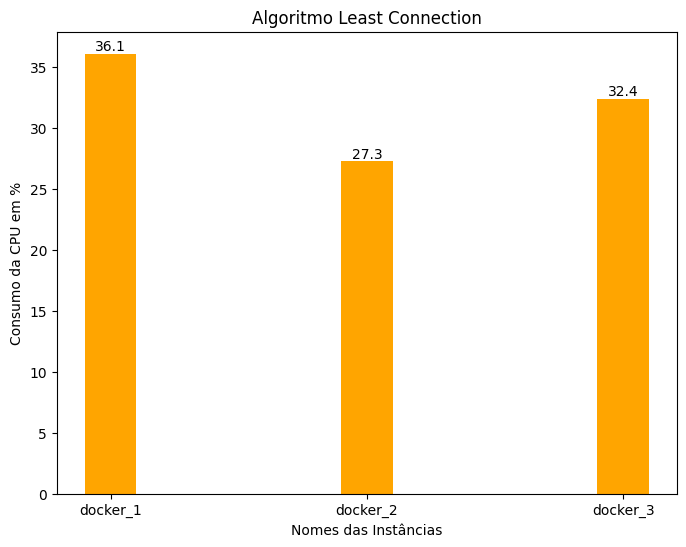

In [122]:
display()

fig = plt.figure(figsize=(8,6))
# server = nome_da_instancia
server = ["docker_1", "docker_2", "docker_3"]
largura = 0.20
grafh = plt.bar(server, docker_percent_cpu, largura,color="orange")

plt.xticks(server)
plt.title("Algoritmo Least Connection")
plt.xlabel("Nomes das Instâncias")
plt.ylabel("Consumo da CPU em %")


for bar, v in zip(grafh, docker_percent_cpu):
  plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), v , ha="center", va="bottom")

plt.savefig("cpu_percent_round_robin_1.pdf", format="pdf", transparent=True, dpi=300, bbox_inches="tight")


plt.show()